In [1]:
%pip uninstall -y qemlib
%pip install --no-cache-dir git+https://github.com/hmzbn/qemlib.git


Found existing installation: qemlib 0.1.0
Uninstalling qemlib-0.1.0:
  Successfully uninstalled qemlib-0.1.0
  Cloning https://github.com/hmzbn/qemlib.git to /tmp/pip-req-build-96118jl1
  Running command git clone --filter=blob:none --quiet https://github.com/hmzbn/qemlib.git /tmp/pip-req-build-96118jl1
  Resolved https://github.com/hmzbn/qemlib.git to commit 5ae76b5d17336e5be92c9889d9fcc6e5741d0dd2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for qemlib: filename=qemlib-0.1.0-py3-none-any.whl size=8442 sha256=19132fc0ad9eb01b4529d8d60cd75be2e193a470afa8ff1b4249d0833119ba57
  Stored in directory: /tmp/pip-ephem-wheel-cache-6tyuscpl/wheels/48/53/28/3a56c589c1141512114d4fc4854932d18cb742b1b2eef8039f
Successfully built qemlib


In [5]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=29143f8a5c380c81d7655e6d4de950e2c4e7a4be6421506803bea2bec720f3c4
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


This notebook demonstrates how to use the Pauli Twirling module
from qemlib to randomize coherent noise.

We apply PT to a simple circuit.

In [1]:
from qiskit import QuantumCircuit
from qemlib.pt import run_pt
from qemlib.pt import random_pauli, PAULIS_CNOT, PAULIS_ECR
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Simple depolarizing noise
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(0.02, 1), ["rx", "rz", "sx"]
)

backend = AerSimulator(noise_model=noise_model)
observable = SparsePauliOp.from_list([("ZZ", 1.0)])


Pauli twirling generates multiple randomized circuits
that are logically equivalent to the original one.

Their expectation values are averaged to reduce
coherent noise effects.


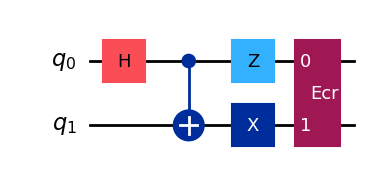

In [2]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

def executor(circuit):
    estimator = Estimator(mode=backend, options={"default_shots": 2000})
    job = estimator.run([(circuit, observable)])
    result = job.result()[0]
    return result.data.evs

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.x(1)
qc.z(0)
qc.ecr(0,1)
qc.draw("mpl")


In [3]:
avg, values = run_pt(qc, executor, shots=20)

print("PT average:", avg)

PT average: 0.006750000000000001
